Import Libraries

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Load the CSV file into a Data Frame

In [2]:

df = pd.read_csv("./Data/marathon.csv")

Display the header of the Data Frame

In [3]:
print("Marathon Data")
print(df.head(10))

Marathon Data
   Run #  Distance  Temp (deg F)  Humidity (%)       Date  Week     Time  \
0      1      3.00            59            86   8/1/2023     1  0:28:52   
1      2      5.00            65            74   8/4/2023     1  0:48:30   
2      3      7.00            70            64   8/7/2023     1  1:13:28   
3      4      3.00            73            67   8/9/2023     2  0:28:30   
4      5      5.01            61            87  8/10/2023     2  0:46:57   
5      6      3.00            67            74  8/13/2023     2  0:28:47   
6      7      7.00            71            67  8/14/2023     2  1:12:03   
7      8      3.02            74            61  8/16/2023     3  0:32:30   
8      9      8.00            81            52  8/23/2023     4  1:21:39   
9     10      6.00            63            80  8/26/2023     4  0:57:34   

   Time (Num)     Pace  Pace (Num)  
0       28.87  0:09:37        9.62  
1       48.50  0:09:42        9.70  
2       73.47  0:10:30       10.50  
3

Define the input variables (independent variables)

In [4]:
X = df[['Distance', 'Temp (deg F)', 'Run #', 'Humidity (%)']]
Dist = df['Distance']
Temp = df['Temp (deg F)']
Runs = df['Run #']
Humid = df['Humidity (%)']
X

,Distance,Temp (deg F),Run #,Humidity (%)
0,3.00,59,1,86
1,5.00,65,2,74
2,7.00,70,3,64
3,3.00,73,4,67
4,5.01,61,5,87
5,3.00,67,6,74
6,7.00,71,7,67
7,3.02,74,8,61
8,8.00,81,9,52
9,6.00,63,10,80


Add a constant to the input variables for the intercept term

In [5]:
X = sm.add_constant(X)

Define the output variable (dependent variable)

In [6]:
Y = df['Pace (Num)']


Fit the multivariate regression model

In [7]:
model = sm.OLS(Y,X).fit()

Print a summary of the regression model

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Pace (Num)   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     7.838
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           0.000137
Time:                        12:46:40   Log-Likelihood:                -27.748
No. Observations:                  39   AIC:                             65.50
Df Residuals:                      34   BIC:                             73.81
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.5537      2.233      6.071   

Plot the residuals vs. predicted values to check for homoscedasticity

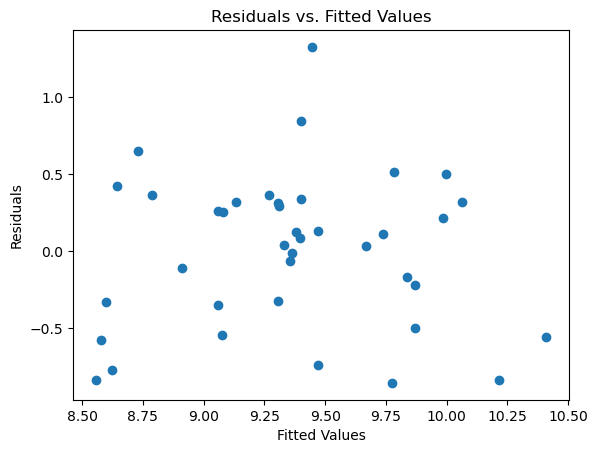

In [9]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

Plot Pace vs # of Runs

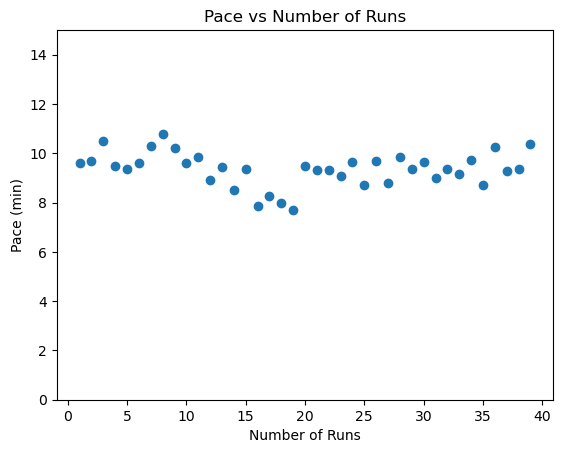

In [10]:
plt.scatter(Runs,Y)
plt.xlabel('Number of Runs')
plt.ylim(0,15)
plt.ylabel('Pace (min)')
plt.title('Pace vs Number of Runs')
plt.show()

Plot Pace vs Distance

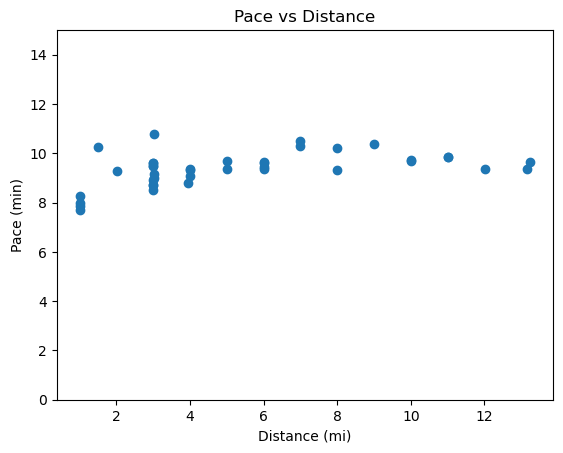

In [11]:
plt.scatter(Dist,Y)
plt.xlabel('Distance (mi)')
plt.ylim(0,15)
plt.ylabel('Pace (min)')
plt.title('Pace vs Distance')
plt.show()

Plot Pace vs Temp

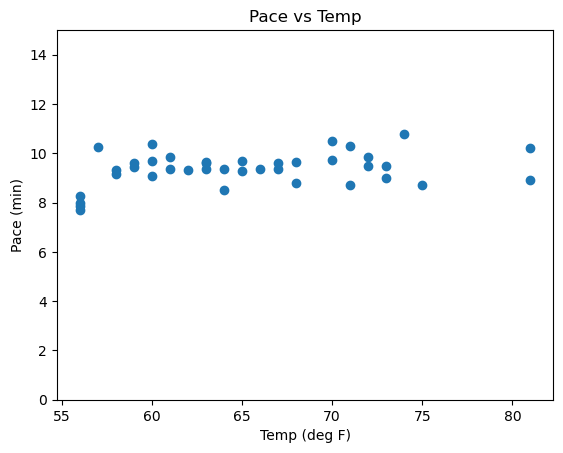

In [12]:
plt.scatter(Temp,Y)
plt.xlabel('Temp (deg F)')
plt.ylim(0,15)
plt.ylabel('Pace (min)')
plt.title('Pace vs Temp')
plt.show()

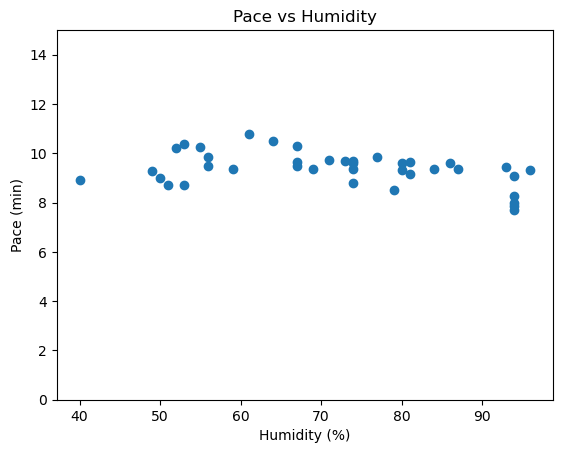

In [13]:
plt.scatter(Humid,Y)
plt.xlabel('Humidity (%)')
plt.ylim(0,15)
plt.ylabel('Pace (min)')
plt.title('Pace vs Humidity')
plt.show()